In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Keerthi A
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv('emails.csv')

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [20]:
# Preview data
df


,label,text,text_length,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,808,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...,2235,computer connection from cnn com wednesday may...
3,1,university degree obtain a prosperous future m...,592,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...,1362,thanks for all your answers guys i know i shou...
...,...,...,...,...
83443,0,hi given a date how do i get the last date of ...,2589,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...,616,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...,534,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...,2113,subscribe change profile contact us long term ...


In [4]:
# Check for missing values
df.isnull().sum()


label    0
text     0
dtype: int64

In [ ]:
# Check class distribution (0 = Not Spam, 1 = Spam)
df['label'].value_counts()

1    43910
0    39538
Name: label, dtype: int64

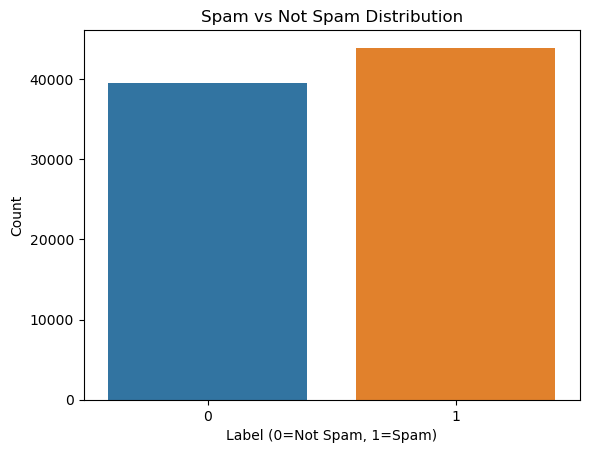

In [6]:
# Visualize label distribution
sns.countplot(data=df, x='label')
plt.title('Spam vs Not Spam Distribution')
plt.xlabel('Label (0=Not Spam, 1=Spam)')
plt.ylabel('Count')
plt.show()


In [17]:
def clean_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove non-ASCII chars
    text = re.sub(r'http\S+', '', text)                    # Remove URLs
    text = re.sub(r'\bescape\w*\b', '', text)              # Remove weird escape tokens
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)               # Keep only letters & space
    text = re.sub(r'\s+', ' ', text)                       # Normalize whitespace
    return text.strip().lower()



# Step 2: Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

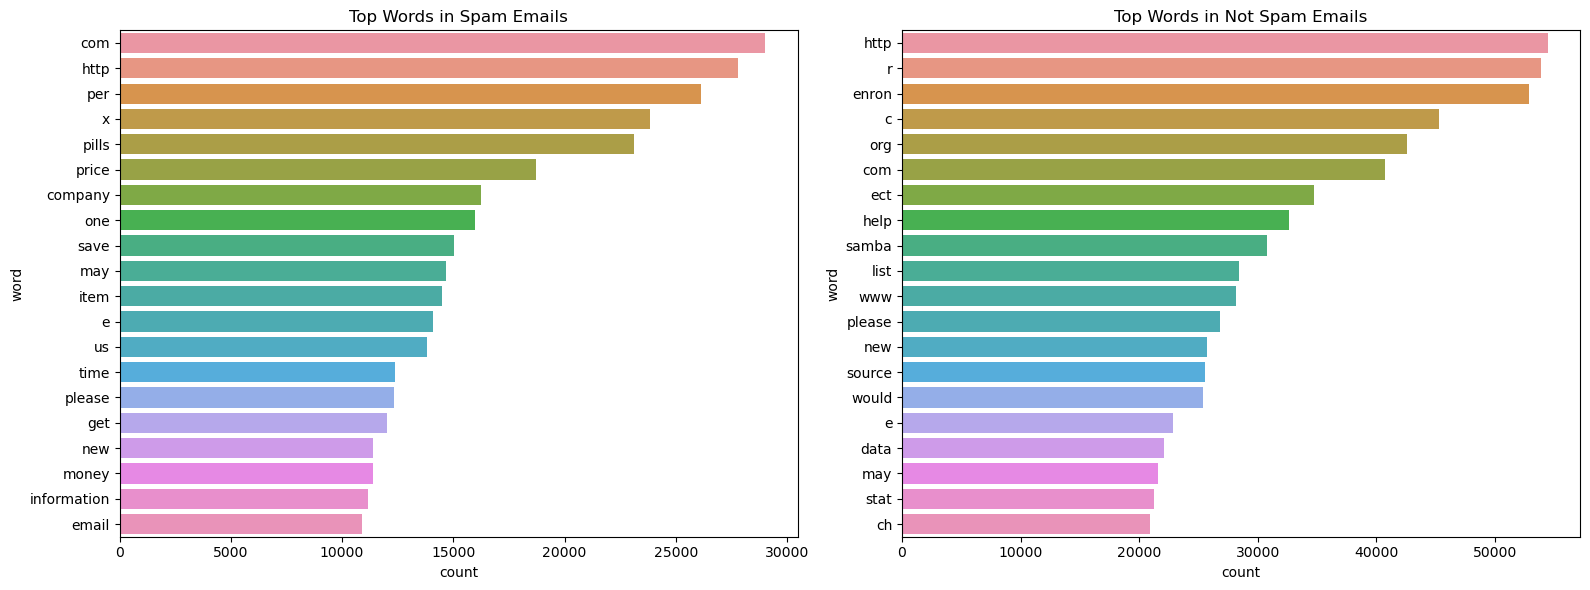

In [18]:
def get_common_words(text_series, n=20):
    all_words = ' '.join(text_series)
    words = [word.strip(string.punctuation) for word in all_words.split()]
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

# Step 4: Get top words
spam_words = get_common_words(df[df['label'] == 1]['clean_text'])
not_spam_words = get_common_words(df[df['label'] == 0]['clean_text'])

# Step 5: Convert to DataFrame for plotting
spam_df = pd.DataFrame(spam_words, columns=['word', 'count'])
not_spam_df = pd.DataFrame(not_spam_words, columns=['word', 'count'])

# Step 6: Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=spam_df, x='count', y='word', ax=axes[0])
axes[0].set_title('Top Words in Spam Emails')

sns.barplot(data=not_spam_df, x='count', y='word', ax=axes[1])
axes[1].set_title('Top Words in Not Spam Emails')

plt.tight_layout()
plt.show()

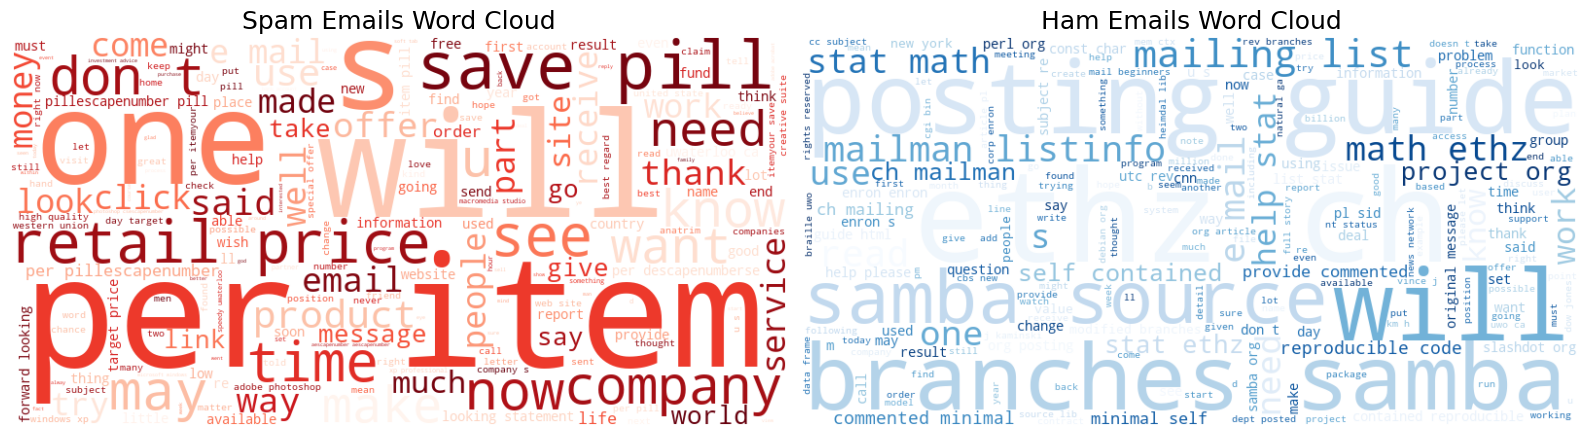

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stopwords if needed
custom_stopwords = set(STOPWORDS)

# Combine with additional custom stopwords (optional)
custom_stopwords.update(["com", "http", "ect","www","x","r","c"])  # Add any domain-specific words here

# Filter spam and ham cleaned texts
spam_text = " ".join(df[df['label'] == 1]['clean_text'].dropna())
ham_text = " ".join(df[df['label'] == 0]['clean_text'].dropna())

# Generate word clouds with stopwords removed
spam_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='Reds'
).generate(spam_text)

ham_wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='Blues'
).generate(ham_text)

# Plot side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Spam Emails Word Cloud", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Emails Word Cloud", fontsize=18)

plt.tight_layout()
plt.show()
